pip install numpy
pip install pandas
pip install seaborn
pip install mat plot lib
pip install scikit-learn

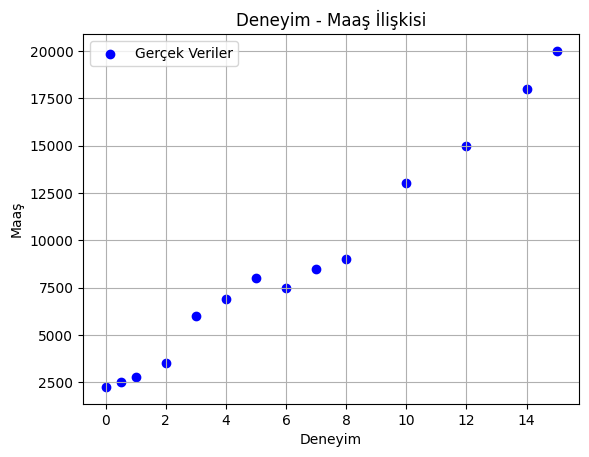

In [15]:
# Örnek
# Deneyim - Maaş bilgisine dayalı bir lineer regresyon yapalım

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Verilerimiz
X = np.array([[0.5], [0], [1], [5], [8], [4], [15], [7], [3], [2], [12], [10], [14], [6]]) # Deneyim
y = np.array([2500, 2250, 2750, 8000, 9000, 6900, 20000, 8500, 6000, 3500, 15000, 13000, 18000, 7500]) # Maaş

plt.scatter(X, y, color="blue", label="Gerçek Veriler")
plt.xlabel("Deneyim") 
plt.ylabel("Maaş")
plt.title("Deneyim - Maaş İlişkisi")
plt.legend()
plt.grid(True)
plt.show()

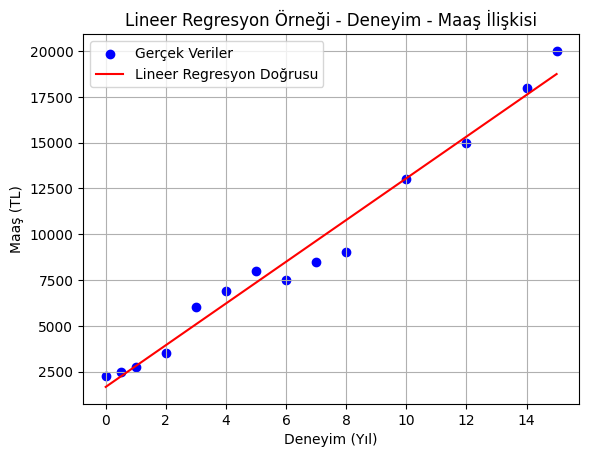

Sabit (a): 1663.8951974741067
Eğim (Slpoe) (b): [1138.34819698]


In [17]:
# Model oluşturma
lr = LinearRegression()
lr.fit(X, y)
#pip install scikit-learn
# Tahmin (regresyon doğrusu)
X_line = np.arange(start=0, stop=16).reshape(-1,1)
y_pred = lr.predict(X_line)

# Görselleştirme
plt.scatter(X, y, color="blue", label="Gerçek Veriler")
plt.plot(X_line, y_pred, color="red", label="Lineer Regresyon Doğrusu")
plt.xlabel("Deneyim (Yıl)") 
plt.ylabel("Maaş (TL)")
plt.title("Lineer Regresyon Örneği - Deneyim - Maaş İlişkisi")
plt.legend()
plt.grid(True)
plt.show()

print("Sabit (a):", lr.intercept_)
print("Eğim (Slpoe) (b):", lr.coef_)

In [ ]:
y = a + bX

In [18]:
1663 + 1138*4

6215

Yukarıdaki grafiği yorumlamak istersek;

* 0 deneyimi olan birisinin maaşı 1663 TL olduğunu,
* Her bir yıllık deneyimin, maaşa etkisi 1138 TL olduğu görüyoruz.
<br></br>

Lineer Regresyon Denkleminde her değişkeni yerine koyarsak;
$$ maas = 1663 + 1138* deneyim$$

$deneyim = 5$ yıl olan birisinin maaşı $ ---> maas = 1663 + 1138*5 = 7353$ TL olacaktır. 

In [20]:
# kod yazarak nasıl yaparız?

deneyim = 20

sonuc = lr.predict(np.array([deneyim]).reshape(-1,1))
print(f"{deneyim} yıllık deneyime sahip birinin maaşı: {sonuc[0]}")


20 yıllık deneyime sahip birinin maaşı: 24430.859136985542


## 2. Çoklu Lineer Regresyon (Multiple Linear Regression)

Bu modelde birden fazla bağımsız değişken (feature) vardır ama model doğrusal kalır.

Denklem:

$$
Y = a + b_1X_1 + b_2X_2 + ... + b_nX_n + \epsilon
$$

Örnek:

Bir arabanın tahmin etmek istiyoruz. Bağımsız değişkenler:
* Motor hacmi
* Yaş
* Kilometre
* Marka

Model:

$$
Fiyat = a + b_1(Motor) + b_2(Yas) + b_3(Km) + b_4(Marka) + ...
$$

Yukarıdaki denkeleme baktığımızda birden fazla değişken var, ama hepsi doğrusal olarak modele eklendiğini görüyoruz.

<br></br>
Örnek:

Deneyim, Yaş - Maaş bilgisine dayalı bir çoklu lineer regresyon (multiple linear regression) örneği yapalım.

Bağımlı ve bağımsız değişken/değişkenlere karar verelim.
* Bağımsız değişken: deneyim, yaş;
* Bağımlı değişken : maaş

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Verilerimiz
deneyim = np.array([0.5, 0, 1, 5, 8, 4, 15, 7, 3, 2, 12, 10, 14, 6]) # Deneyim
maas = np.array([2500, 2250, 2750, 8000, 9000, 6900, 20000, 8500, 6000, 3500, 15000, 13000, 18000, 7500]) # Maaş
yas = np.array([22, 21, 23, 25, 28, 23, 35, 29, 22, 23, 32, 30, 34, 27]) # yaş

df = pd.DataFrame({"Deneyim": deneyim, "Maas": maas, "Yas":yas})
df.tail()

,Deneyim,Maas,Yas
9,2.0,3500,23
10,12.0,15000,32
11,10.0,13000,30
12,14.0,18000,34
13,6.0,7500,27


In [25]:
# df.loc[:,["Deneyim", "Yas"]].values # böyle alırız ya da
# df.iloc[:, [0,2]].values # bu şekilde de alırız. 

# istediğim verileri nasıl çekeceğimi anladıysam, bağımlı - bağımsız değişkenleri almak vakti.

X = df.iloc[:, [0,2]].values # Bağımsız değişken
y = df["Maas"].values.reshape(-1,1)  # Bağımlı değişken


# Çoklu Lineer Regresyon Modeli 
multi_lin_reg = LinearRegression()
multi_lin_reg.fit(X, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [26]:
# Test1
test_veri1 = np.array([[10,35]]) # deneyim = 10, yaş = 35
test_sonuc1 = multi_lin_reg.predict(test_veri1)
print(f" {test_veri1[0][0]} yıllık deneyim ve {test_veri1[0][1]} yaş sonucu çıkan maaş: {test_sonuc1[0]} TL")

 10 yıllık deneyim ve 35 yaş sonucu çıkan maaş: [11046.35815877] TL


In [28]:
# Test2
test_veri2 = np.array([[5,20]]) # deneyim = 10, yaş = 35
test_sonuc2 = multi_lin_reg.predict(test_veri2)
print(f" {test_veri2[0][0]} yıllık deneyim ve {test_veri2[0][1]} yaş sonucu çıkan maaş: {test_sonuc2[0]} TL")

 5 yıllık deneyim ve 20 yaş sonucu çıkan maaş: [9669.68734989] TL


## 3. Polinom Regresyon (Polynomial Regression)

Bu modelde tek bir değişken bile olsa, bu değişkenin **üsleri (kuvvetleri)** modele katılır. Yani model doğrusal değil, eğrisel **(non-linear)** olur.

Denklem:

$$
Y = a + b_1X + b_2X^2 + b_3X^3 + ... + b_nX^n + \epsilon
$$

$n$ : Polinomun derecesi.

* Eğer doğrusal olmayan bir veri setine doğrusal regresyon uygularsak, iyi bir sonuç elde edemeyiz. Bu nedenle doğrusal olmayan veri seti üzerine polinomsal regresyon uygulamak daha iyi sonuç verecektir.

![non-linear](non-linear.jpg)

<br></br>
Dezavantajları:

* Polinomun derecesi arttıkça aşırı öğrenme (Overfitting) çok yatkın hale gelir. Model, eğitim verisini ezberler ama yeni verilerde başarısız olur.

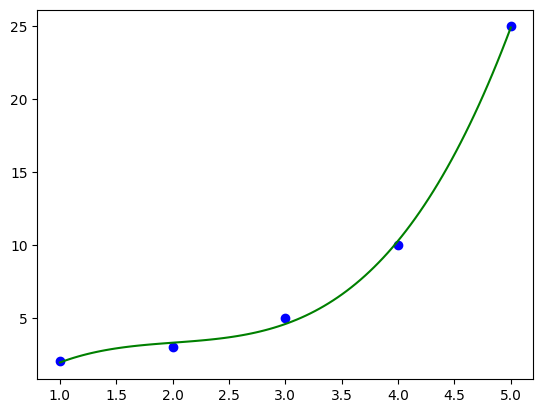

In [34]:
# Rastgele bir örnek yapalım.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Örnek veri oluşturalım.

X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
y = np.array([2, 3, 5, 10, 25])

# Polinom Özelliğini Oluşturma (derece=2)
poly = PolynomialFeatures(degree=3)
X_Poly = poly.fit_transform(X)

# Model (Liner Regresyon) Uygulama
model = LinearRegression()
model.fit(X_Poly, y)

# Tahmin 
X_new = np.linspace(1, 5, 100).reshape(-1, 1)
X_new_poly = poly.transform(X_new)
y_pred = model.predict(X_new_poly)
#y_pred1 = model.predict(X_Poly) # Kırmızı çizgi 

plt.scatter(X, y, color="blue")
#plt.plot(X, y_pred1, color="red")
plt.plot(X_new, y_pred, color="green")
plt.show()

Örnek:

Araba fiyatları ve hızlarını içeren bir örnek yapalım

In [35]:
arr = np.array([
    [60, 180],
    [70, 180],
    [80, 200],
    [100, 200],
    [120, 200],
    [150, 220],
    [200, 240],
    [250, 240],
    [300, 300],
    [400, 350],
    [500, 350],
    [750, 360],
    [1000, 365],
    [2000, 365],
    [3000, 365]
])

df = pd.DataFrame(arr, columns=["price", "speed"])
df.head(2)

,price,speed
0,60,180
1,70,180


In [48]:
X = df["price"].values.reshape(-1, 1)
y = df["speed"].values.reshape(-1, 1)

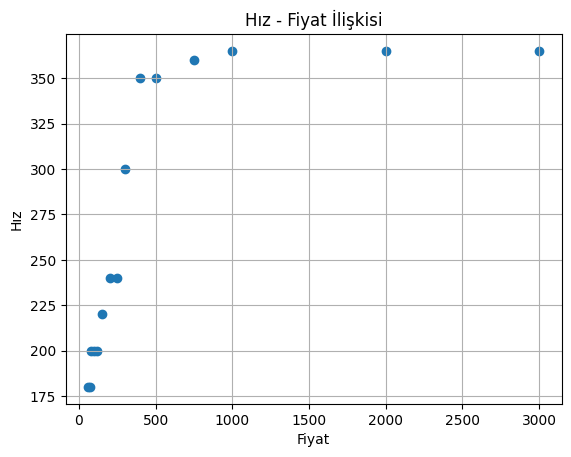

In [49]:
# veriyi görselleştirelim.
plt.scatter(X, y)
plt.ylabel("Hız")
plt.xlabel("Fiyat")
plt.title("Hız - Fiyat İlişkisi")
plt.grid()
plt.show()

* Hem lineer regresyon hem de polinom regresyon yapalım.

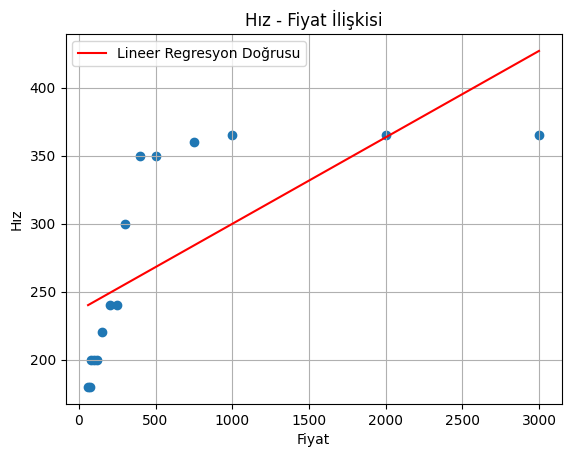

Araba fiyatı 300 ise hızı: [[255.3570075]]


In [51]:
# Doğrusal Regresyon
model_LinearReg = LinearRegression()
model_LinearReg.fit(X, y) # x-hız, y-fiyat

y_pred = model_LinearReg.predict(X)
plt.scatter(X, y)
plt.plot(X, y_pred, color="red", label ="Lineer Regresyon Doğrusu")
plt.ylabel("Hız")
plt.xlabel("Fiyat")
plt.title("Hız - Fiyat İlişkisi")
plt.grid(True)
plt.legend()
plt.show()

fiyat = 300
print(f"Araba fiyatı {fiyat} ise hızı: {model_LinearReg.predict(np.array([fiyat]).reshape(1, -1))}")

* Araba değeri 5000 olunca hızı da 553 Km/h oluyor. Lineer Regresyon modeli kullandığımızda modelin düzgün cevap vermediğini görüyoruz.
* Şimdi ise Polinom Regresyonu uygulayalım.

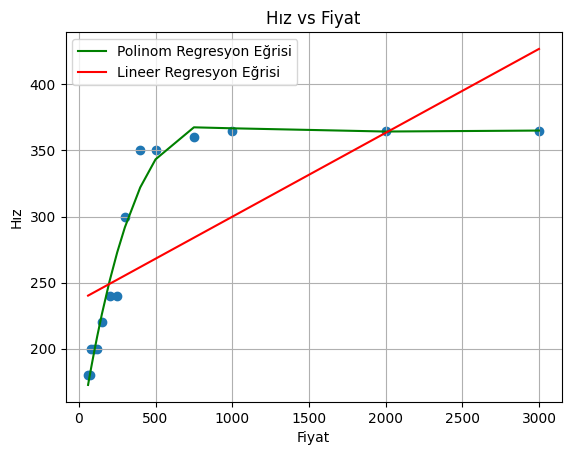

In [57]:
# Polinom Özellikler (Polynomial Features) ekleyeceğiz.
poly_LinearReg = PolynomialFeatures(degree=4) # 2.dereceden polinom olarak ayarladık. En uygun olan 4 ama 2,3,4 şeklinde görerek ilerleyelim.

X_poly = poly_LinearReg.fit_transform(X)
X_poly

# Polinomsal Regresyon eğitme
model_PolyReg = LinearRegression()
model_PolyReg.fit(X_poly, y)

# tahmin ve görselleştirme
y_predPoly = model_PolyReg.predict(X_poly)

plt.scatter(X, y)
plt.plot(X, y_predPoly, color="green", label="Polinom Regresyon Eğrisi")
plt.plot(X, y_pred, color="red", label="Lineer Regresyon Eğrisi")
plt.ylabel("Hız")
plt.xlabel("Fiyat")
plt.title("Hız vs Fiyat")
plt.legend()
plt.grid(True)
plt.show()

## 4. Ridge Regresyon (Ridge Regression)

Doğrusal regresyonun **aşırı öğrenme** problemini çözmek için kullanılan bir düzenleştirme (regularization) tekniğidir. Özellikle çok sayıda özelliği olduğu durumlarda etkilidir.

* Çalışma Mantığı: Standart doğrusal regresyonun maliyet fonksiyonuna, katsayıların karelerinin toplamını içeren bir ceza terimi (L2 Regularization) ekler. Bu ceza terimi, modelin katsayıları çok fazla büyütmesini engelleyerek daha stabil ve genellenebilir bir model oluşturur.

* Avantajları:
  * Aşırı öğrenmeyi azaltır.
  * Birbiriyle ilişkili (çoklu doğrusal bağlantı - multicollinearity) özelliklerin olduğu durumlarda performansı artırır.
<br></br>

* Dezavantajları:
  * Katsayıları sıfıra yaklaştırır ama tam olarak sıfır yapmaz. Bu nedenle otomatik özellik seçimi yapmaz.

Denklem:

Lineer Regresyonda kullandığımız model:
$$
y = a + bX
$$

Ridge, modelin **b (eğim)** değerlerinin çok büyük olmasını engeller. Bunu, **b'nin karesini** cezalandırarak yapar.

$$
Hata (Loss) = (y_{gercek} - y_{Tahmin})^2 + \lambda * b^2
$$
$$
Hata (Loss) = \sum(y_{gercek} - (a +bX))^2 + \lambda * \sum b^2
$$

https://online.stat.psu.edu/stat857/node/155/

$\lambda :$ Cezalandırma katsayısı (ne kadar büyükse, $b$ o kadar küçülür) (kullanıcı verir)

$b^2 :$ Eğimin karesi (büyük $b$ değerlerini cezalandırır)

* İlk kısım (normal hata): modelin tahmin hatası
* İkinci kısım $(\lambda b^2)$ : Ridge'in eklemiş olduğu ceza

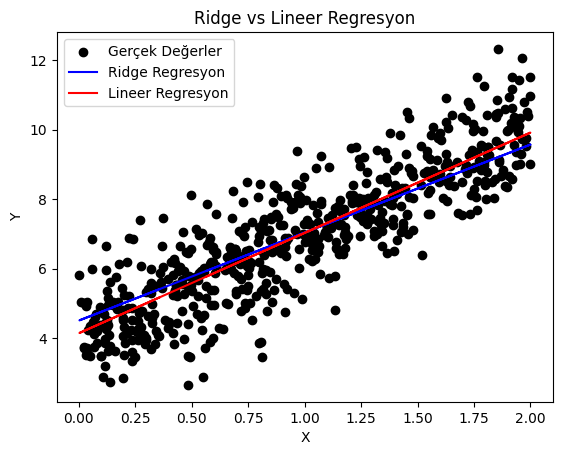

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.model_selection import train_test_split #veriyi ayırma işlemi için gerekli

# Basit veri üretelim
np.random.seed(0)

X = 2 * np.random.rand(1000, 1)
y = 4 + 3 * X + np.random.randn(1000, 1)

# Train-test bölünmesi
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.60, random_state=42)

# Ridge Regresyon Modeli
ridge_model = Ridge(alpha = 20.0)
ridge_model.fit(X_train, y_train)

# Normal Lineer Regresyon Modeli
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Tahminler (Ridge, Lineer)
y_pred_ridge = ridge_model.predict(X_test)
y_pred_linear = linear_model.predict(X_test)

# Sonuçları çizelim
plt.scatter(X_test, y_test, color="black", label="Gerçek Değerler")
plt.plot(X_test, y_pred_ridge, color="blue", label="Ridge Regresyon")
plt.plot(X_test, y_pred_linear, color="red", label="Lineer Regresyon")
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Ridge vs Lineer Regresyon")
plt.show()